# 作業

- 作業目標 : iris (dataset.load_iris()) 資料嘗試跑 kmeans (可以測試不同的群數 , init 等)

In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
np.random.seed(5)
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data
y = iris.target
%matplotlib inline

### 載入 相關套件 並 執行 kmean 實驗 ...

- 實驗測試不同的群數
- 實驗測試不同的初始值
- 呈現結果

In [2]:
estimators = [
    (f'k_means_{n}', KMeans(n_clusters=n)) for n in [2, 3, 4, 5]
    ] + \
    [('k_means_3_bad_init', KMeans(n_clusters=3, n_init=1,
    init='random'))]

Text(0.5, 1.0, 'k_means_3_bad_init')

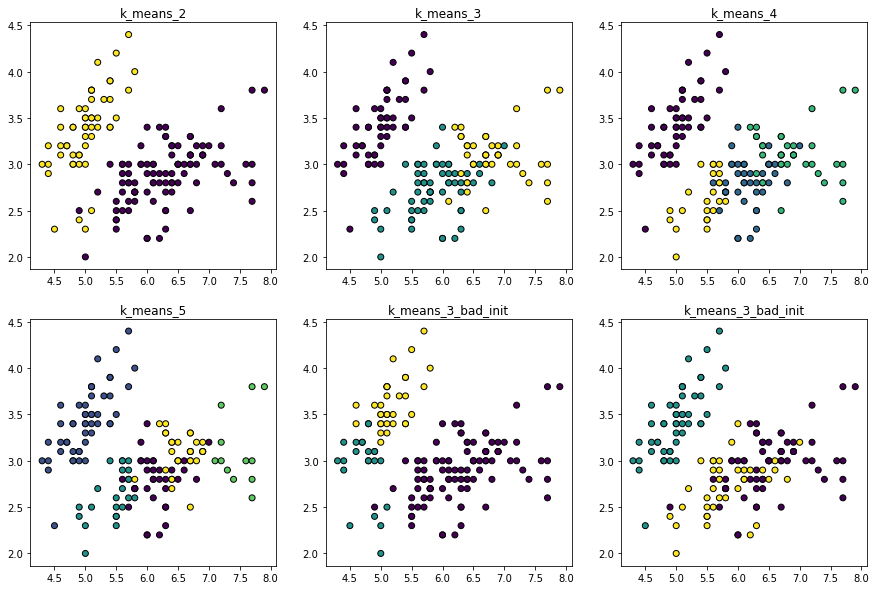

In [4]:
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for num, data in enumerate(estimators):
    name, est = data
    ## fit data
    est.fit(X)
    labels = est.labels_

    ax[num//3, num%3].scatter(
        X[:, 0],
        X[:, 1],
        c=labels.astype(np.float),
        edgecolor='k')
    ax[num//3, num%3].set_title(name)

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax[-1, -1].scatter(
    X[:, 0],
    X[:, 1],
    c=y,
    edgecolor='k')
ax[-1, -1].set_title("Truth")

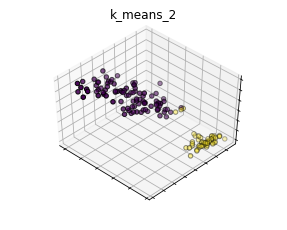

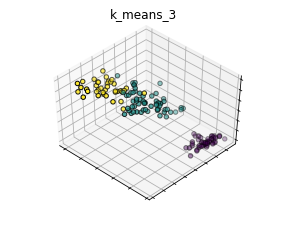

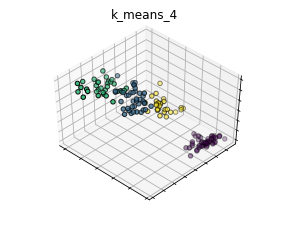

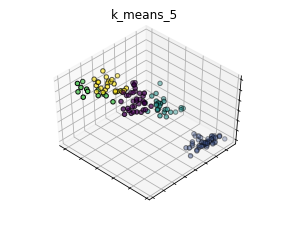

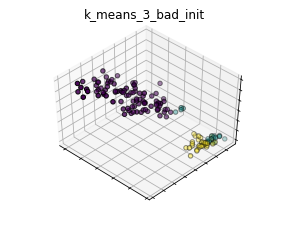

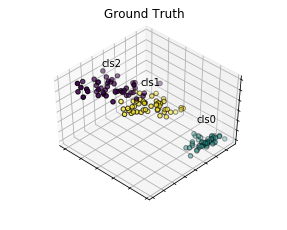

In [3]:
titles = ['8 clusters', '3 clusters', '3 clusters, bad initialization']
for num, data in enumerate(estimators):
    name, est = data
    fig = plt.figure(num, figsize=(4, 3))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
    ## fit data
    est.fit(X)
    
    labels = est.labels_

    ax.scatter(X[:, 3], X[:, 0], X[:, 2],
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_title(name)
    ax.dist = 12

# Plot the ground truth
fig = plt.figure(5, figsize=(4, 3))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

for name, label in [('cls0', 0),
                    ('cls1', 1),
                    ('cls2', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean(),
              X[y == label, 2].mean() + 2, name,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('Ground Truth')
ax.dist = 12

#fig.show()